<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject</div>
<span style="">MicroProject: Open Policing Project</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/open-policing-project/">https://discovery.cs.illinois.edu/microproject/open-policing-project/</a></div>
</h1>

<hr style="color: #DD3403;">

## Data Source: [Stanford Open Policing Project](https://openpolicing.stanford.edu/)

The Stanford Open Policing Project is an initiative by the Stanford Computational Journalism Lab to collect, analyze, and provide access to traffic stop data from across the United States.  According to the Open Policing Project, *"on a typical day in the United States, police officers make more than 50,000 traffic stops"*. The Open Policing Project aims to provide a comprehensive view of interactions between police officers and the public, focusing on the data collected during traffic stops. It's a crucial resource for understanding issues related to racial profiling, law enforcement tactics, and social justice.

The data are collected from state-level and local-level police departments across the country.  As of 2023, project has already collected more than 200 million records from 42 state police departments and growing. The data are collected in a standardized format, and the project provides a [data dictionary](https://openpolicing.stanford.edu/data/) to explain the meaning of each column in the data.

This MicroProject will only be looking at the data from the state of Illinois and explore one possible racial disparity among traffic stops in Champaign-Urbana.

## Getting Started: Importing the Necessary Libraries

To work with the data, we'll need to import pandas:

In [37]:
# Import `pandas`:
import pandas as pd 

<hr style="color: #DD3403;">

## Part 1: Data Preparation

To get the data ready for analysis we will first need to do some preprocessing.

### Puzzle 1.1: Read The Data

Use the `read_csv` function from pandas to read the data from the `illinois_opp.csv.zip`. The data is quite large (the CSV is over 3 GB, over 12 million rows, and 21 columns), and pandas allows us to not need to extract the zip file to load the entire CSV file into memory.

Instead we can just use the read_csv function from pandas to read the data directly from the zip file. The `read_csv` function has a `compression` argument which can be set to `zip` to read data directly from a zip file.  For example:
> ```
> pd.read_csv("file.zip", compression="zip")
> ```

Use `pd.read_csv` to read `illinois_opp.csv.zip` into a DataFrame called `df`.

*(NOTE: Because the data is quite large, it **may take a minute or two to load the data**.)*

In [38]:
# Read the CSV contains in "data.zip":
df = pd.read_csv("data.zip", compression="zip")

C:\Users\DELL\AppData\Local\Temp\ipykernel_19828\2889022652.py:2: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.zip", compression="zip")


In [39]:
### TEST CASE for Puzzle 1.1: Read The Data
tada = "\N{PARTY POPPER}"

assert("df" in vars())
assert("subject_race" in df)
assert(len(df) == 12748173)
assert(df["subject_race"].iloc[30] == "white")
print(f"{tada} All Tests Passed! {tada}") 

🎉 All Tests Passed! 🎉


### Puzzle 1.2: Examine the Data

Before we start working with the data, lets see what columns are available. Because the data is so large, we don't want to print out the entire DataFrame. Instead we can use the `columns` attribute to get a list of all the columns in the DataFrame.

In [40]:
# Explore the columns in `df`:
df.columns

Index(['date', 'time', 'subject_race', 'subject_sex', 'department_name',
       'type', 'violation', 'citation_issued', 'warning_issued', 'outcome',
       'contraband_found', 'contraband_drugs', 'contraband_weapons',
       'search_conducted', 'search_person', 'search_vehicle',
       'reason_for_stop', 'raw_DriverRace', 'raw_ReasonForStop',
       'raw_TypeOfMovingViolation', 'raw_ResultOfStop'],
      dtype='object')

Now that we know what columns are available, lets look at all the unique values in one of the columns. We can use the `unique` method to get a list of all the unique values in a column. Lets look at the unique values in the `department_name` column. The `department_name` column contains the name of the police department that made the traffic stop.

In [41]:
# Explore the all of the unique police departments included in the dataset:
df["department_name"].unique()

array(['CHICAGO POLICE', 'MILAN POLICE', 'OKAWVILLE POLICE', ...,
       'DANA POLICE', 'GREENVIEW POLICE', 'SIDELL POLICE'], dtype=object)

Your list of unique values probably doesn't show all the values. This is because there are over 1000 unique values in the `department_name` column. In the next puzzle we will only want to look a some of the departments.  To show all the rows:

- Convert the set of unique values to a Python list: `list( df["department_name"].unique() )`
- Now, at the bottom, you will see the text:

> Output is truncated. View as a <u>scrollable element</u> or open in a <u>text editor</u>. Adjust cell <u>output settings</u>...

- Click either "scrollable element" or "text editor" to then view the entire list without the output being truncated.




In [42]:
# Explore the all of the unique police departments included in the dataset, as a Python list:
list( df["department_name"].unique() )

['CHICAGO POLICE',
 'MILAN POLICE',
 'OKAWVILLE POLICE',
 'MONEE POLICE',
 'LAKEMOOR POLICE',
 'SHOREWOOD POLICE',
 'GALVA POLICE',
 'WOODSON POLICE',
 'OAKBROOK TERRACE POLICE',
 'MCCOOK POLICE',
 'HENDERSON COUNTY SHERIFF',
 'ROSCOE POLICE',
 'FONDULAC PARK DISTRICT POLICE',
 'UNIVERSITY OF ILLINOIS CHICAGO POLICE',
 'PAWNEE POLICE',
 'ROCK FALLS POLICE',
 'ILLINOIS DEPARTMENT OF NATURAL RESOURCES POLICE',
 'STEELEVILLE POLICE',
 'WINFIELD POLICE',
 'ALEXANDER COUNTY SHERIFF',
 'PLANO POLICE',
 'SECRETARY OF STATE POLICE',
 'PULASKI COUNTY SHERIFF',
 'FULTON POLICE',
 'MOUNT STERLING POLICE',
 'HAMPSHIRE POLICE',
 'ELMHURST POLICE',
 'LAKE VILLA POLICE',
 'WOODFORD COUNTY SHERIFF',
 'CRAWFORD COUNTY SHERIFF',
 'LINCOLNSHIRE POLICE',
 'BOONE COUNTY SHERIFF',
 'SOUTHERN ILLINOIS UNIVERSITY EDWARDSVILLE POLICE',
 'RANTOUL POLICE',
 'CARROLL COUNTY SHERIFF',
 'FORRESTON POLICE',
 'WESTCHESTER POLICE',
 'GLENWOOD POLICE',
 'MOUNT VERNON POLICE',
 'RAYMOND POLICE',
 'COLCHESTER POLICE',
 '

### Puzzle 1.3: Keeping Relevant Rows

We currently have the data for the entire state of Illinois. We are only interested in the data from the cities of Champaign and Urbana. We will use the`department_name` column to filter the data. We will want to see if either the word "Champaign" **OR** "Urbana" appears in the `department_name` column.

- Using the `.str.contains` operation on a DataFrame, create a DataFrame called `UIUC_df` that contains only the rows that the `department_name` contains "Champaign" or "Urbana".
- See the DISCOVERY guide [Selecting DataFrame Rows Based on String Contents](https://discovery.cs.illinois.edu/guides/DataFrame-Row-Selection/dataframe-string-contains/) for quick details on how to use `.str.contains`.
- Make sure to check the Puzzle 1.2 to notice how the case of the strings need to be to find a match.

In [43]:
UIUC_df = df[(df["department_name"].str.contains("CHAMPAIGN"))|(df["department_name"].str.contains("URBANA"))]
UIUC_df

,date,time,subject_race,subject_sex,department_name,type,violation,citation_issued,warning_issued,outcome,...,contraband_drugs,contraband_weapons,search_conducted,search_person,search_vehicle,reason_for_stop,raw_DriverRace,raw_ReasonForStop,raw_TypeOfMovingViolation,raw_ResultOfStop
155920,2012-01-07,00:32:00,white,male,CHAMPAIGN COUNTY SHERIFF,vehicular,Equipment,False,True,warning,...,NaN,NaN,False,False,False,Equipment,1,2,0,2
155921,2012-01-07,03:29:00,white,male,CHAMPAIGN COUNTY SHERIFF,vehicular,Moving Violation: Lane Violation,False,True,warning,...,NaN,NaN,False,False,False,Moving Violation: Lane Violation,1,1,2,2
155922,2012-01-06,23:07:00,white,female,CHAMPAIGN COUNTY SHERIFF,vehicular,Moving Violation: Traffic Sign or Signal,False,True,warning,...,NaN,NaN,False,False,False,Moving Violation: Traffic Sign or Signal,1,1,4,2
155923,2012-01-06,14:30:00,white,female,CHAMPAIGN COUNTY SHERIFF,vehicular,License Plate/Registration,False,True,warning,...,NaN,NaN,False,False,False,License Plate/Registration,1,3,0,2
155924,2012-01-06,16:18:00,white,male,CHAMPAIGN COUNTY SHERIFF,vehicular,License Plate/Registration,False,True,warning,...,NaN,NaN,False,False,False,License Plate/Registration,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595790,2017-12-30,20:43:00,white,female,URBANA POLICE,vehicular,Moving Violation: Other,True,False,citation,...,NaN,NaN,False,False,False,Moving Violation: Other,1,1,6,1
12595791,2017-12-30,21:13:00,white,female,URBANA POLICE,vehicular,License Plate/Registration,True,False,citation,...,NaN,NaN,False,False,False,License Plate/Registration,1,3,0,1
12595792,2017-12-30,21:16:00,asian/pacific islander,male,URBANA POLICE,vehicular,Equipment,True,False,citation,...,NaN,NaN,False,False,False,Equipment,5,2,0,1
12595793,2017-12-31,19:55:00,white,female,URBANA POLICE,vehicular,Moving Violation: Traffic Sign or Signal,True,False,citation,...,NaN,NaN,False,False,False,Moving Violation: Traffic Sign or Signal,1,1,4,1


In [44]:
### TEST CASE for Puzzle 1.3: Keeping Relevant Rows
tada = "\N{PARTY POPPER}"

assert("UIUC_df" in vars())
assert(len(UIUC_df) == 102891)
assert(UIUC_df["subject_race"].iloc[2000] == "black")
assert(len(UIUC_df[UIUC_df["subject_race"].str.contains("white")]) == 57830)
assert(len(UIUC_df[UIUC_df["subject_race"].str.contains("black")]) == 28700)
print(f"{tada} All Tests Passed! {tada}") 

🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Part 2: Analyzing Racial Disparities among Chambana Traffic Stops

In Part 2 we will look at how likely it is for different racial groups to be searched during a traffic stop in Champaign-Urbana (or simply "Chambana"). 

In this MicroProject, we're going to specifically explore:
- The number of total traffic stops by race,
- The number of traffic stops that result in a search taking place by race, and finally
- The proportion of all traffic stops that result in a search taking place by race,

You can go further and analyze many other things in the dataset as well!

### Puzzle 2.1: Frequency of Stops per Race

To find the frequency of stops per race, we will focus on the `subject_race` column in the dataset. This column categorizes each traffic stop by the race of the person who was stopped. Since `UIUC_df` the dataset already contains all the stops in the Chambana area, we can use this column to get a comprehensive view of racial distributions in traffic stops.

Using `groupby` (see: [DISCOVERY: Grouping Data in Python](https://discovery.cs.illinois.edu/learn/Exploratory-Data-Analysis/Grouping-Data-in-Python/) for a refresher), group the data by the `subject_race` columns and aggregate the cells together by counting the total number of rows for each `subject_race`.

Store this new DataFrame containing the counts of traffic stops by race as `traffic_stops_by_race`:

In [45]:
traffic_stops_by_race = UIUC_df.groupby("subject_race").agg("count").reset_index()
traffic_stops_by_race

,subject_race,date,time,subject_sex,department_name,type,violation,citation_issued,warning_issued,outcome,...,contraband_drugs,contraband_weapons,search_conducted,search_person,search_vehicle,reason_for_stop,raw_DriverRace,raw_ReasonForStop,raw_TypeOfMovingViolation,raw_ResultOfStop
0,asian/pacific islander,11490,11490,11490,11490,11490,11490,11490,11490,11490,...,89,89,11490,11490,11490,11490,11490,11490,11490,11490
1,black,28700,28700,28700,28700,28700,28700,28700,28700,28700,...,2952,2952,28700,28700,28700,28700,28700,28700,28700,28700
2,hispanic,4643,4643,4643,4643,4643,4643,4643,4643,4643,...,310,310,4643,4643,4643,4643,4643,4643,4643,4643
3,other,228,228,228,228,228,228,228,228,228,...,5,5,228,228,228,228,228,228,228,228
4,white,57830,57830,57830,57830,57830,57830,57830,57830,57830,...,1642,1642,57830,57830,57830,57830,57830,57830,57830,57830


Finally, modify your `traffic_stops_by_race` DataFrame so that it has only two columns: `subject_race` and `stops`:

In [46]:
traffic_stops_by_race["stops"]=traffic_stops_by_race["reason_for_stop"]
traffic_stops_by_race = traffic_stops_by_race[["subject_race","stops"]]
traffic_stops_by_race

,subject_race,stops
0,asian/pacific islander,11490
1,black,28700
2,hispanic,4643
3,other,228
4,white,57830


### Puzzle 2.2: Frequency of Searches per Race

Repeat the process again, except now create a DataFrame `traffic_stops_searches_by_race`.

- In this new DataFrame, make sure to only include rows from `UIUC_df` where `search_conducted` is `True`.
- Then, ensure `traffic_stops_searches_by_race` contains on the columns `subject_race` and `searches`.
- Feel free to create extra Python cells here if needed. :)

In [47]:
df1 = UIUC_df[UIUC_df["search_conducted"]==True].groupby("subject_race").agg("count").reset_index()
df1["searches"] = df1["raw_ReasonForStop"]
traffic_stops_searches_by_race = df1[["subject_race","searches"]]
traffic_stops_searches_by_race

,subject_race,searches
0,asian/pacific islander,89
1,black,2952
2,hispanic,310
3,other,5
4,white,1642


In [48]:
### TEST CASE for Puzzles 2.1 and 2.2: Creating Filtered DataFrames
tada = "\N{PARTY POPPER}"

assert("traffic_stops_by_race" in vars())
assert("traffic_stops_searches_by_race" in vars())

assert(len(traffic_stops_by_race) == 5 and len(traffic_stops_searches_by_race) == 5)

assert("stops" in traffic_stops_by_race)
assert("searches" in traffic_stops_searches_by_race)
assert("subject_race" in traffic_stops_by_race and "subject_race" in traffic_stops_searches_by_race)

assert(89 in traffic_stops_searches_by_race["searches"].values)
assert(228 in traffic_stops_by_race["stops"].values)

print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


### Puzzle 2.3: Likelihood of Being Searched by Race

Now that we have found the frequency of certain races being stopped and searched we want to find the probability of a person who has been stopped to be searched given their race. More specifcally we want to find:

> $ P(searched | RACE = race) $

...where race is a race from the `subject_race` column.

We will do this by simply dividing the number of people who have been searched by the number of people who have been stopped for each race.  The first thing we need to do is to combine the two DataFrames.

- Since our DataFrames `traffic_stops_by_race` and `traffic_stops_searches_by_race` both have a shared column name, we can use `pd.merge` to merge the two DataFrames.
- See the [DISCOVERY Guide: Combining DataFrames by Merging](https://discovery.cs.illinois.edu/guides/Combining-DataFrames/Combining-DataFrames-by-Merging/) to see the specific syntax.

Create a new DataFrame called `df_merged` that merges the two DataFrames into a single DataFrame:

In [49]:
df_merged = pd.merge(traffic_stops_by_race,traffic_stops_searches_by_race)
df_merged

,subject_race,stops,searches
0,asian/pacific islander,11490,89
1,black,28700,2952
2,hispanic,4643,310
3,other,228,5
4,white,57830,1642


Finally, create a new column in `df_merged` called `"P(searched | race)"` that contains the probability of being searches for each race:

In [50]:
df_merged["P(searched | race)"]=(df_merged["searches"])/(df_merged["stops"])
df_merged

,subject_race,stops,searches,P(searched | race)
0,asian/pacific islander,11490,89,0.007746
1,black,28700,2952,0.102857
2,hispanic,4643,310,0.066767
3,other,228,5,0.021930
4,white,57830,1642,0.028394


In [51]:
### TEST CASE for Puzzle 2.3: Likelihood of Being Searched by Race
tada = "\N{PARTY POPPER}"
import math

assert("df_merged" in vars())
assert(len(df_merged) == 5)
assert("P(searched | race)" in df_merged)
assert("stops" in df_merged and "searches" in df_merged)
assert(math.isclose(df_merged["P(searched | race)"].sum(), 0.22769357713611307))
assert(math.isclose(df_merged["P(searched | race)"].std(), 0.038780423471650304))

print(f"{tada} All Tests Passed! {tada}") 


🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Part 3: Visualizing the Disparity

Using `df_merged.plot.bar(...)`, we can visualize our DataFrame to see the disparity:

<Axes: title={'center': 'Probability of being searched at a traffic stop in Champaign-Urbana'}, xlabel='subject_race'>

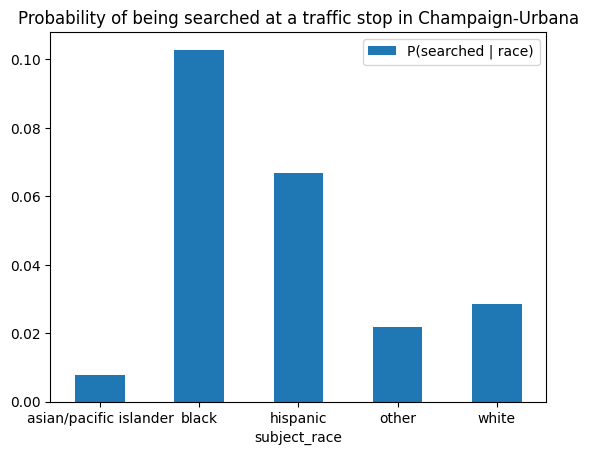

In [52]:
df_merged.plot.bar(
  y="P(searched | race)",
  x="subject_race",
  title="Probability of being searched at a traffic stop in Champaign-Urbana",
  rot=0,
)

<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and return to https://discovery.cs.illinois.edu/microproject/open-policing-project/ and complete the section **"Commit and Grade Your Notebook"**.

3. If you see a 100% grade result on your GitHub Action, you've completed this MicroProject! 🎉
